In [191]:
import numpy as np # scientific computing
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # reading images
from skimage.color import rgb2gray # converting rgb images to grayscale
import cv2


save = False

### Step 1: Detecting/Tracking the position of parking space(s)

**Step 1**: Gray-Scale

**Step 2**: Apply Gaussian Blur to the image to reduce noise.

**Step 3**: Canny

**Step 4**: Hough Lines

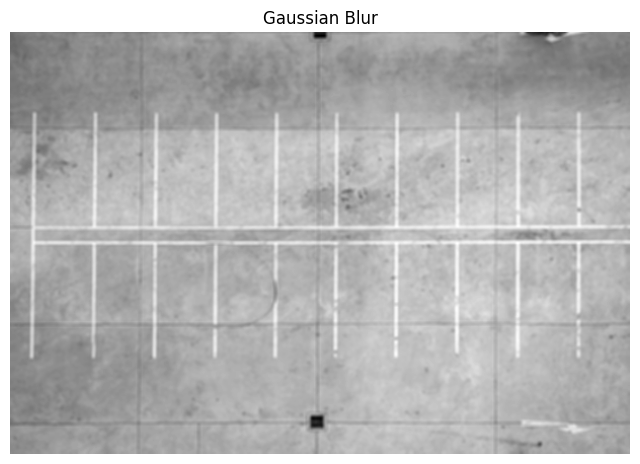

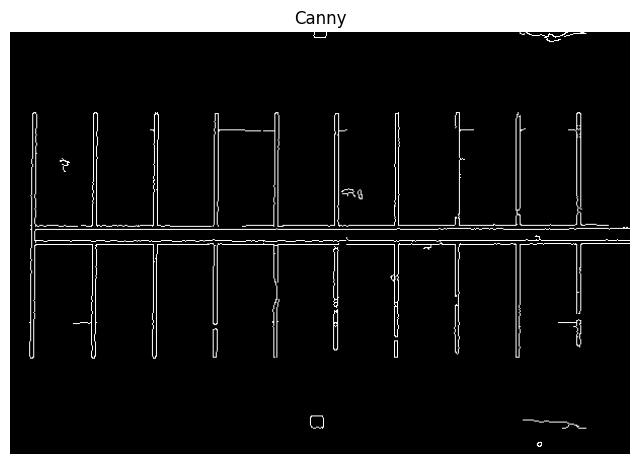

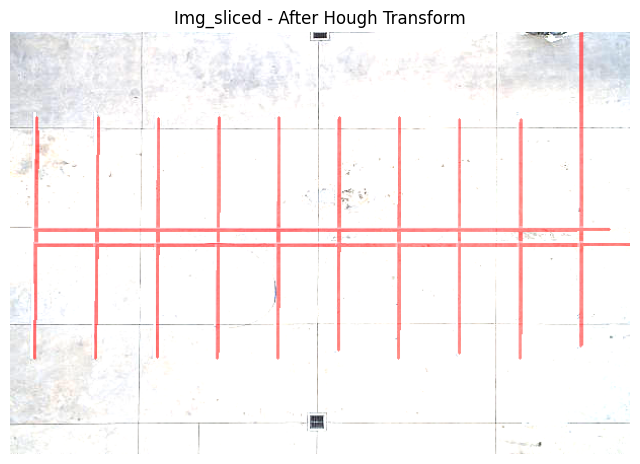

In [192]:
img1 = mpimg.imread('images\lot_empty.jpg')
img1_sliced = img1[:,:,:3]

img1_gray = cv2.cvtColor(img1_sliced, cv2.COLOR_BGR2GRAY)
img1_blur = cv2.GaussianBlur(img1_gray, (5, 5), 1.505)
img1_canny = cv2.Canny(img1_blur, 50, 150)


plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Gaussian Blur')
plt.imshow(img1_blur, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Canny')
plt.imshow(img1_canny, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()


# Attempt to remove double lines with kernel and dilation and eroding
kernel = np.ones((4,4),np.uint8)
img1_canny = cv2.dilate(img1_canny, kernel, iterations=2)
img1_canny = cv2.erode(img1_canny, kernel, iterations=3)


lines = cv2.HoughLinesP(image=img1_canny, rho=1, theta=np.pi/180, threshold=75, minLineLength=15, maxLineGap=90)
line_image = np.copy(img1)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0 , 0), 2)

lines_edges = cv2.addWeighted(img1, 0.8, line_image, 1, 0)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Img_sliced - After Hough Transform')
plt.imshow(lines_edges, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()



### Step 2: Identify if there is a car in the parking space(s)